### ライブラリのインポート

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

import time
from sklearn.decomposition import TruncatedSVD

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### シード値

In [2]:
SEED = 7
TEST_RATE = 0.3

### データセットの作成

In [3]:
dataset = fetch_20newsgroups(shuffle=True, random_state=SEED)

In [4]:
name_list = list(dataset.target_names)

In [5]:
name_list

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
df = pd.DataFrame(dataset.data)
df.columns = ["text"]
df["test_num"] = dataset.target
df["test"] = [name_list[i] for i in df["test_num"]]
df.head()

,text,test_num,test
0,From: clay@cs.scarolina.edu (F Rodney Clay)\nS...,5,comp.windows.x
1,From: merlin@neuro.usc.edu (merlin)\nSubject: ...,1,comp.graphics
2,From: battle@cs.utk.edu (David Battle)\nSubjec...,6,misc.forsale
3,From: vojak@icebucket.stortek.com (Bill Vojak)...,16,talk.politics.guns
4,From: fcrary@ucsu.Colorado.EDU (Frank Crary)\n...,16,talk.politics.guns


In [7]:
df.iloc[0, 0]

"From: clay@cs.scarolina.edu (F Rodney Clay)\nSubject: Slider Position of Vertical Scrollbars\nSummary: Slider Position of a List Widget's Vertical Scrollbar\nOrganization: USC  Department of Computer Science\nDistribution: comp\nLines: 10\n\nI need help positioning the slider of a List widget's horizontal scrollbar.  I am displaying the full\npath of a selected file in a list widget.  The horizontal's slider defaults to the left side of the\nlist widget; however, I need the slider on the right side.  This is so the user can SEE the file name\nthey selected.  I know it's possible, because when files are displayed in a file selection dialog box,\nthe slider is on the right side.\n\nThanking any and all who can help in advance,\nRodney F. Clay\n\nclay@cs.scarolina.edu\n"

### カウントベクタライザー

In [8]:
start = time.time()

vec_count = CountVectorizer()
train = vec_count.fit_transform(df["text"])
X_train, X_test, y_train, y_test = train_test_split(train, df["test_num"], test_size=TEST_RATE, random_state=SEED)
model = linear_model.RidgeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average = 'micro'))

print(f"elapsed_time:{round((time.time() - start), 1)}[sec]")

0.8606774668630339
elapsed_time:325.2[sec]


In [9]:
print(train.shape)
print(train.sum())
print(type(train))
print(train.data)
print(train.indices)

(11314, 130107)
3369673
<class 'scipy.sparse.csr.csr_matrix'>
[1 4 2 ... 1 1 1]
[ 56979  40281  43740 ... 105137  29982  37416]


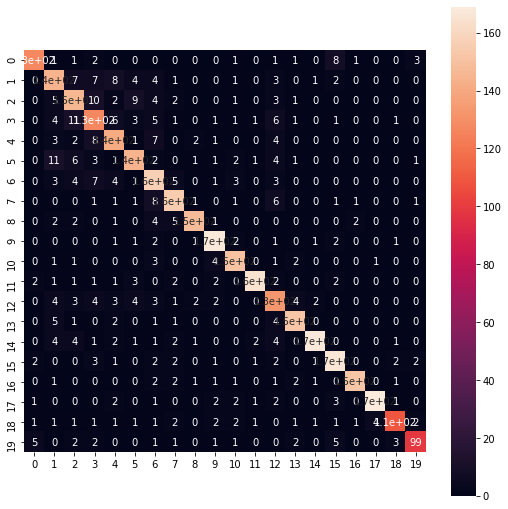

In [10]:
plt.figure(figsize=(9, 9))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True,  square=True)

### TruncatedSVD で次元削減

n_components:0,  f1スコア 0.1434462444771723
elapsed_time:1.6[sec]
n_components:1,  f1スコア 0.49867452135493373
elapsed_time:8.2[sec]
n_components:2,  f1スコア 0.7620029455081001
elapsed_time:35.9[sec]
n_components:3,  f1スコア 0.8244477172312223
elapsed_time:75.6[sec]


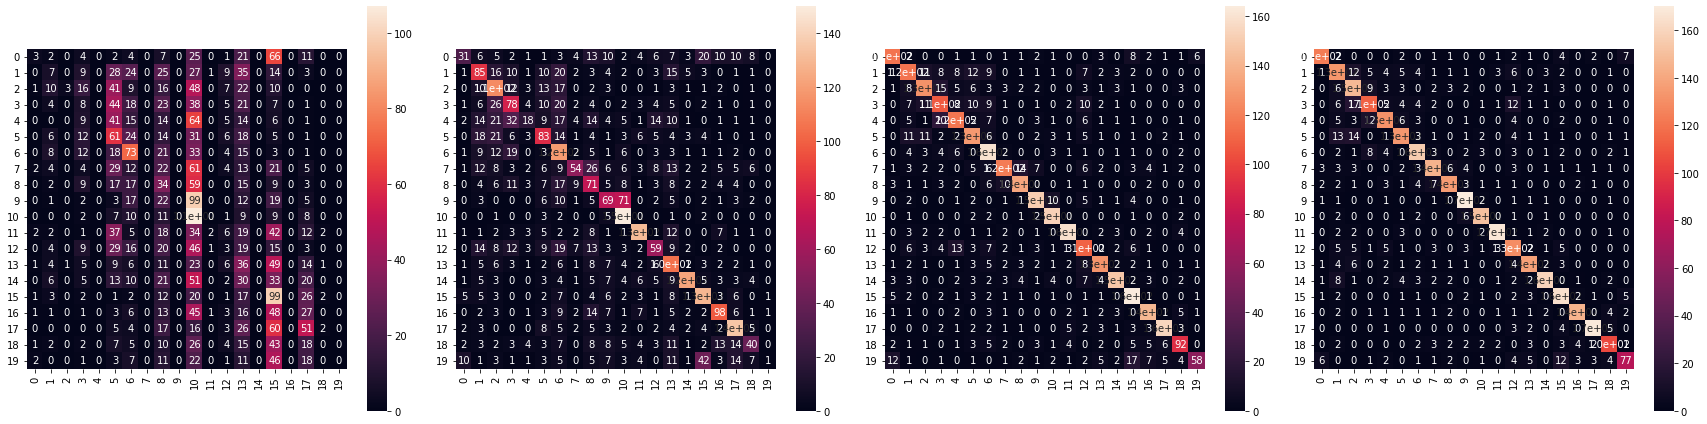

In [11]:
vec_count = CountVectorizer()
train = vec_count.fit_transform(df["text"])

param_list = [10,  100,  500, 1000]

plt.figure(figsize=(24, 6))

for i in range(len(param_list)):
    start = time.time()

    svd = TruncatedSVD(n_components=param_list[i], random_state=SEED)
    feature = svd.fit_transform(train)
    X_train, X_test, y_train, y_test = train_test_split(feature, df["test_num"], test_size=TEST_RATE, random_state=SEED)
    model = linear_model.RidgeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"n_components:{i},  f1スコア {f1_score(y_test, y_pred, average = 'micro')}")
    print(f"elapsed_time:{round((time.time() - start), 1)}[sec]")

    plt.subplot(1, 4, i+1)
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True,  square=True)

plt.tight_layout()

### Tfidf ベクタライザー

In [12]:
start = time.time()

vec_tfidf = TfidfVectorizer()
train = vec_tfidf.fit_transform(df["text"])
X_train, X_test, y_train, y_test = train_test_split(train, df["test_num"], test_size=TEST_RATE, random_state=SEED)
model = linear_model.RidgeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average = 'micro'))

print(f"elapsed_time:{round((time.time() - start), 1)}[sec]")

0.9248895434462445
elapsed_time:6.8[sec]


In [13]:
print(train.shape)
print(type(train))
print(train.sum())
print(train.data)
print(train.indices)

(11314, 130107)
<class 'scipy.sparse.csr.csr_matrix'>
101449.99450491065
[0.05112157 0.02823648 0.02403386 ... 0.05561683 0.00980286 0.01960572]
[ 26298 124147  27436 ...  89362 111322  56979]


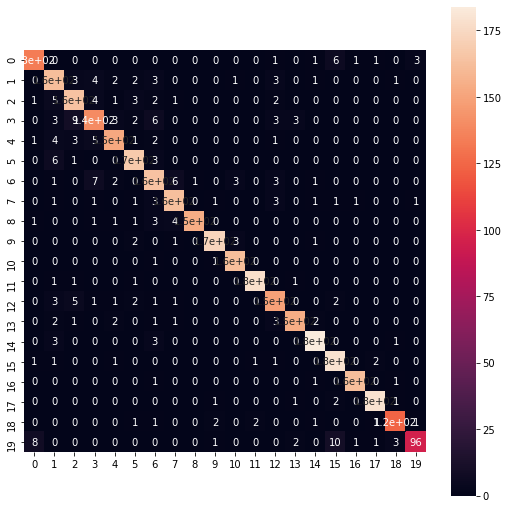

In [14]:
plt.figure(figsize=(9, 9))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True,  square=True)